# Q-Learning Implementation on Snake Game

**Capstone Project:** To Study the Methodologies of Reinforcement Learning and to Develop an Understanding of Problem Representation in Code<br>
**Author:** Pranav Panchal<br>
**Notebook:** 3 of 3<br>
**Previous Notebook:** Exploration of OpenAI Gym<br>

### Table of contents
1. [Discrete v/s Continuous Space](#Discrete-v/s-Continuous-Space)
2. [Snake Game Environment](#Snake-Game-Environment)
3. [Objective of the Snake Game](#Objective-of-the-Snake-Game)
4. [Data Dictionary - Important Functions](#Data-Dictionary---Important-Functions)
5. [Observation Space & Action Space](#Observation-Space-&-Action-Space)
6. [Q-Table](#Q-Table)
7. [Q-Learning Model](#Q-Learning-Model)
8. [Model 1](#Model-1)
9. [Model 2](#Model-2)
10. [Model 3](#Model-3)
11. [Model Saving and Reloading](#Model-Saving-and-Reloading)
12. [But, Wait](#But,-Wait)
13. [Conclusion](#Conclusion)

Note: The training results may vary within reason as the runs are random. This custom environment has not been coded with the seed functionality.

### Discrete v/s Continuous Space

For the FrozenLake game seen in the previous notebook the state was represented by the position on the grid. The agent was only able to view that particular grid and was able to perform `4 actions` on each grid space. The agent could only have 1 of 16 distinct states. This is an example of a `discrete observation space` and `discrete action space`.

<img src = "https://www.gymlibrary.dev/_images/frozen_lake.gif" width = 200>
<center><i>(Image Source: <a>https://www.gymlibrary.dev/_images/frozen_lake.gif</a>)</i></center>

If we look another example environment like the CartPole environment available in gym module, we notice that the `observation space` for this environment is completely different than the FrozenLake environment.

The objective of the CartPole problem is to balance the pole till a score of 200 is achieved. At time `t = 0` the `reward` is `0` and it keeps on increasing continuously as long as the agent is able to balance the pole. The episode is `terminated` when the pole angle reaches $\pm12^\circ$   or the cart moves `2.4 units` away from the origin in either direction.

<img src = "https://www.tensorflow.org/quantum/tutorials/images/gym_CartPole.gif" width = 450>
<center><i>(Image Source: <a>https://www.tensorflow.org/quantum/tutorials/images/gym_CartPole.gif</a>)</i></center>

In this environment the `state` is given by 4 values of `cart position`, `cart velocity`, `pole angle` and `pole angular velocity`. All these values can take any range between their upper and lower limits respectively and so the `observation space` in this environment is infinitely large, i.e., the `observation space` is continuous.

*Q-learning algorithm does not work with continuous observation space or action space because, in such cases the q-table itself will be infinitely large.*

### Snake Game Environment

The snake game environment is created using the Pygame module in python. The environment was created to understand how a problem definition must be represented in a python environment. By having control over the game parameters, we can modify them and observe the behavior of learning of the agent.

One of the most challenging aspects of environment definition is the representation of state space. This dictates what the agent can essentially observe in the environment. If we misrepresent the state space or action space, it can have massive consequences in the learning of the agent.

<img src = "images\Snake_AI_2022-09-22.gif" width = 300>
<center>Snake Game Environment</center>

For our environment the agent is able to take 1 of 3 actions at any time, i.e. either go `straight`, go `left` or go `right`. 

Though our snake agent runs on a grid we cannot define the state space as a grid like in the case of FrozenLake. This is because unlike the FrozenLake environment where the Start(S) and the Goal(G) always remained in the same grid location, in the snake game the location of the food changes in every episode even though the snake always spawns from the center of the grid. 

### Objective of the Snake Game

Coming back to the Snake environment, using default parameters the game grid is 20x20. The objective of the game are as follows:
-	To navigate to the food which generates randomly on the grid and eat it.
-	To avoid touching its own body, having done so would terminate the game.
-	To avoid going beyond the edges of the grid which would result is episode termination.

### Data Dictionary - Important Functions

Below are some important functions to help navigate the Snake Game environments: 

- env_name = gym.make("Snake-v0") $\Longrightarrow$ Initialises the environment.<br>
Additional parameters may be passed:
    - render_mode $\rightarrow$ To specify the render type of the environment.<br>
    - width $\rightarrow$ Defines the width of the game window.<br>
    - height $\rightarrow$ Defines the height of the game window.<br>
    - speed $\rightarrow$ Defines the speed at which the game plays.<br><br>

- env_name.reset(self) $\Longrightarrow$ Resets the environment to an initial state and returns the initial observation.<br><br>

- env_name.step(self, action) $\Longrightarrow$ Run one timestep of the environment’s dynamics.<br><br>

- env_name.render(self) $\Longrightarrow$ Render frames as specified by render_mode attribute during initialization of the environment.<br><br>

- env_name.close(self) $\Longrightarrow$ Closes the environment during end of training or testing cycle.<br><br>

- env_name.action_space $\Longrightarrow$ This attribute gives the format of valid actions.<br><br>

- env_name.observation_space $\Longrightarrow$ This attribute gives the format of valid observations.

More information about gym environments can be looked up at https://www.gymlibrary.dev/

In [1]:
# Importing dependencies
import sys
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import gym
import gym_game

from IPython.display import clear_output

In [2]:
# Run the game for 10 step
# This is a standard code available on the gym website to test the environment
# Initialize the game environment
env = gym.make("Snake-v0", speed = 50)#, render_mode="human") # render_mode = 'human' indicates visual rendering of the game environment
                                                     # if not passed, the game will run in background and will not render

# getting the initial state of the environment
state = env.reset()

episodes = 10

# looping through the game steps
for episode in range(episodes):
    # getting a sample action from the action_space
    action = env.action_space.sample()
    
    # getting the environment variables as a consequence of taking an action
    new_state, reward, done, truncated, info = env.step(action)
    
    # checking if the game ended
    if done or truncated:
        # setting initial state of the environment and getting the state variables
        total_rewards += reward
        state, info = env.reset()
        
    # printing the episode and score
    print(f"# Episode: {episode + 1} #\t\t# Score:{info['Score']} #\n")

# closing the environment
env.close()

C:\Users\prana\anaconda3\envs\deeplearning\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
C:\Users\prana\anaconda3\envs\deeplearning\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
C:\Users\prana\anaconda3\envs\deeplearning\lib\site-packages\gym\utils\passive_env_checker.py:199: UserWarning: WARN: The result returned by `env.reset()` should be `(obs, info)` by default, , where `obs` is a observation and `info` is a dictionary containing additional information.
  logger.warn(
C:\Users\prana\anaconda3\envs\deeplearning\lib\site-packages\gym\utils\passive_env_checker.py:137: UserWarning: WARN: The obs re

# Episode: 1 #		# Score:0 #

# Episode: 2 #		# Score:0 #

# Episode: 3 #		# Score:0 #

# Episode: 4 #		# Score:0 #

# Episode: 5 #		# Score:0 #

# Episode: 6 #		# Score:0 #

# Episode: 7 #		# Score:0 #

# Episode: 8 #		# Score:0 #

# Episode: 9 #		# Score:0 #

# Episode: 10 #		# Score:0 #



In the snake environment, we are not able to score by just randomly selecting the actions. This is because the observation space of the environment is large and also the physical size of the game grid (20x20) is also large.

In [3]:
# Specify the gym environment
env = gym.make('Snake-v0', speed = 10000) # speed is set to 10000 as we want fast training times

### Observation Space & Action Space

In [4]:
# Checking the state size and action size
action_space_size = env.action_space.n
state_space_size = env.observation_space
print(f"Action space size: {action_space_size}")
print(f"Observaton space size: {state_space_size}")

Action space size: 3
Observaton space size: Box(0, [8 4 8], (3,), int32)


The action space size is 3 depicting the `STRAIGHT`, `LEFT` and `RIGHT` moves.

The observation space is of box type. This is a special representation of real valued quantities. We are specifically using a discreate box type as ourlowest observation value is `[0 0 0]` and our highest observation value is `[8 4 8]`. The shape of the box type (3,) (the comma indicates that this is a box type data), and the datatype of value used in the box observation is `int32`.

The state of the environment at any given time can be thought of as a list of 3 numbers. Each of these 3 numbers represent a separate physical quantity in the game. These are as follows:
- The first number checks the space around the head of the snake, it can represents whether there is a possibility of collision in any of the 8 directions on a grid.
- The second number represent the direction in which the snake is moving on the grid. Since the snake can only move in 4 direction this number is limited to 4.
- The final number represents the direction of the food on the grid space relative to the head of the snake. This does not indicate the distance to the food. 

On the backend the state is coded in binary and later mapped to integers to conform to the box representation.

More information on gym spaces can be found at https://www.gymlibrary.dev/api/spaces/

### Q-Table

In [5]:
# Q-table initialisation, where the rows represent the state_space and the columns represent the action_space

# Since the observation space is a box type, we get the size of the state space by subtracting the lowest observation value
# from the highest observation value

state_low = env.observation_space.low
state_high = env.observation_space.high
state_size = state_high - state_low

# generating the Q-table
q_table = np.random.rand(*state_size, action_space_size) * 10**-2

# Sanity check
q_table

array([[[[7.86299909e-03, 6.54937040e-03, 3.44671316e-03],
         [6.13346481e-03, 6.57173824e-03, 2.71384849e-03],
         [3.09508257e-03, 9.46642837e-03, 8.02132250e-03],
         [9.20909941e-03, 9.50761519e-03, 6.38664831e-03],
         [5.64539833e-03, 2.38485770e-03, 5.75084646e-04],
         [2.35584812e-03, 1.65301138e-03, 2.02149517e-03],
         [7.91159800e-03, 3.83675415e-03, 9.10213917e-03],
         [4.03898174e-03, 4.92884311e-03, 3.25382640e-03]],

        [[5.19017695e-03, 4.36329841e-03, 1.52902167e-03],
         [4.29975188e-03, 3.81549350e-03, 7.33294902e-03],
         [1.31543842e-03, 4.49173756e-03, 8.81604282e-03],
         [5.90392227e-04, 2.92679900e-03, 6.82449310e-03],
         [6.81333679e-03, 9.36302520e-03, 6.54111501e-03],
         [3.47725412e-04, 4.95989788e-03, 3.01661147e-03],
         [6.27618884e-03, 9.43803989e-03, 8.30740674e-03],
         [5.32610993e-03, 9.48942080e-03, 6.85750066e-03]],

        [[6.18758279e-03, 2.43907903e-03, 3.50501048

You can see Q-table for the snake environment is huge. As the environment complexity increases so does the size of the Q-table.

In [6]:
# check the shape of the Q-table
q_table.shape

(8, 4, 8, 3)

`Q-table` is a 4 dimensional matrix where each dimension is represented by `collision possibility`, `direction of movement`, `food direction` and `possible action`.

We can utilize the same exact model as that of the FrozenLake environment. This is because the core nature of the agent does not change and by passing the correct `Q-table` and parameters the same agent can perform well in most environments.

### Q-Learning Model

In [7]:
# Q-learning algorithm
def simulate3():
    
    global epsilon
    
    for episode in range(episodes):
        # get the state of the environment
        state = env.reset()

        done = False

        # set the current episode reward
        rewards_current_episode = 0
        
        for step in range(max_steps_per_episode):                        

            # exploration-exploitation trade-off, randomly choose epsilon_threshold between 0 and 1
            epsilon_threshold = np.random.uniform(0, 1)
            if epsilon_threshold < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            # get the new state variables
            new_state, reward, done, truncated, info = env.step(action)

            # update the q_table for Q(s,a)
            q_table[state][action] = q_table[state][action] * (1 - learning_rate)\
                                    + learning_rate * (reward + discount_rate * np.max(q_table[new_state]))

            # update the old state to be the new state
            state = new_state

            # update the reward of current state
            rewards_current_episode = reward

            # check for terminating condition
            if done or step >= max_steps_per_episode - 1:
                break                                
#                 if episode % 1000 == 0 and episode != 0:
#                     print(f"Average of {episode} episodes is {sum(score_list[-1000:])/1000}\n")

        # epsilon decay
        epsilon = min_epsilon\
                            + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episode)
#         if epsilon >= min_epsilon:
#             epsilon = epsilon* epsilon_decay_rate

        # append the total number of step taken in the episode
        step_list.append(step)
        
        # append the total score of the episode
        score_list.append(info['Score'])
        
        # append the rewards received during the episode
        rewards_all_episodes.append(rewards_current_episode)
        
        # append the epsilon value in the episode
        epsilon_each_episode.append(epsilon)
        
        
        print(f"Episode: {episode}", end = "\r")

Let us pass some parameter to this model and populate the `Q-table`.

### Model 1

In [8]:
# total no. of episodes
episodes = 5000

# max steps to be taken during an episode, if this is not specified the game will run till it reaches termination state
max_steps_per_episode = 500

# learning parameters
learning_rate = 0.1
discount_rate  = 0.9
epsilon = 1
max_epsilon = 1
min_epsilon = 0.005
epsilon_decay_rate = 0.001

# initiallize the Q-table
state_low = env.observation_space.low
state_high = env.observation_space.high
state_size = state_high - state_low
action_size = env.action_space.n
q_table = np.random.rand(*state_size, action_size) * 10**-2

# store each episode variables
rewards_all_episodes = []
epsilon_each_episode = []
step_list = []
score_list = []

# Run the model
simulate3()

Viewing the entire Q-table is cumbersome. However, we can view a slice of it to ensure that the values are being updated.

In [9]:
# print updated Q-table
print("# Q-Table slice #\n")
print(q_table[0][0])

# Q-Table slice #

[[3.91300193 2.93473701 7.55758767]
 [4.74032483 2.34822567 2.12471655]
 [8.97582768 3.60320238 2.91205674]
 [4.90570736 2.31143872 0.811554  ]
 [4.24441702 8.17984398 2.50961242]
 [2.91072074 5.01194484 2.92244756]
 [2.3618659  3.8469864  2.22203464]
 [2.61397843 2.75676081 2.80180552]]


Notice that we initialised the `Q-table` with values with power $10^{-2}$, but now it has larger values which means that training is happening.

Lets check the average game score i.e. the length of snake. These are calculated as averages per 1000 episodes.

In [10]:
# Calculate and print the average score per thousands episodes
score_thousand_episodes = []
score_thousand_episodes = np.split(np.array(score_list), episodes / 1000)
count = 1000
print("# Average reward per thousand episodes: #")
for r in score_thousand_episodes:
    print(count, ": ", str(sum(r) / 1000))
    count += 1000

# Average reward per thousand episodes: #
1000 :  0.792
2000 :  2.047
3000 :  4.314
4000 :  7.425
5000 :  10.527


In [11]:
# Calculating the averages of the episode variables
# Calculate the average score per five hundred episodes
score_five_hundred_episodes = []
score_five_hundred_episodes = np.split(np.array(score_list), episodes / 500)
cent = 500

avg_score_per_five_hundred = []
for r in score_five_hundred_episodes:
    avg_score_per_five_hundred.append((sum(r) / 500))
    cent += 500

# Calculate the average steps taken by the snake per five hundred episodes
step_five_hundred_episodes = []
step_five_hundred_episodes = np.split(np.array(step_list), episodes / 500)
cent = 500

avg_step_per_five_hundred = []
for r in step_five_hundred_episodes:
    avg_step_per_five_hundred.append((sum(r) / 500))
    cent += 500

Lets make a few plots to see the progress of the snake over the number of episodes.

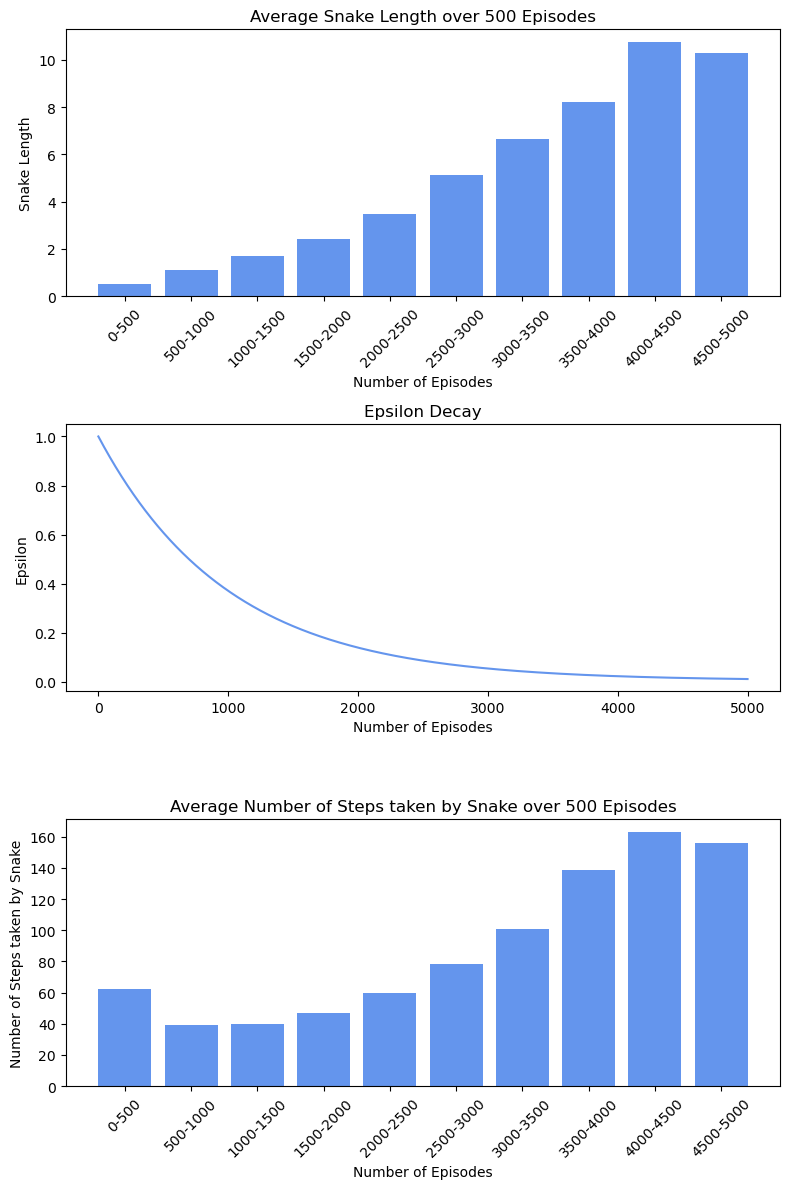

In [12]:
plt.subplots(3, 1, figsize=(8, 12))

x_ticks = ['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000', '3000-3500', '3500-4000','4000-4500','4500-5000']

plt.subplot(3, 1, 1)
plt.bar(x_ticks, avg_score_per_five_hundred, color = 'cornflowerblue')
plt.xlabel("Number of Episodes")
plt.xticks(rotation=45)
plt.ylabel("Snake Length")
plt.title("Average Snake Length over 500 Episodes")

plt.subplot(3, 1, 2)
plt.plot(epsilon_each_episode, color = 'cornflowerblue')
plt.xlabel("Number of Episodes")
plt.ylabel("Epsilon")
plt.title("Epsilon Decay")

plt.subplot(3, 1, 3)
plt.bar(x_ticks, avg_step_per_five_hundred, color = 'cornflowerblue')
plt.xlabel("Number of Episodes")
plt.xticks(rotation=45)
plt.ylabel("Number of Steps taken by Snake")
plt.title("Average Number of Steps taken by Snake over 500 Episodes")

plt.tight_layout()
plt.show()

**Plot 1:** The score represents the length of snake because whenever the snake eat a food item its score increases by 1 and so does its length. Therefore, this plot presents the average snake length over chunks of 500 episodes. The average length of snake increases as we progress through the episodes. For the first 500 episode the average length of snake is less than 1 and towards the end of training it reaches around 10.

**Plot 2:** The epsilon decay is gradual and it reaches near its defined minimum `(0.005)` after approximately 4000 episodes.

**Plot 3:** Shows the average number of steps of game time units the snake survived. This is an important measurement as it shows how the snake learns to avoid the boundaries and eventually its own body. Initially the snake is able to survive for ~60 steps however during the 1000-1500 episode the steps reduces. Notice that during this time the average length of snake is increasing, this indicates that the snake is learning to move towards the food and in doing so it is dying. As episodes pass, it eventually figures out to maneuver its body to safely reach the food. The highest average number of steps reached by this model is above 160 in the 4500-5000 episode chunk.

### Model 2

Lets change the model parameters and check whether the performance of our snake improves.

In [13]:
# total no. of episodes
episodes = 5000

# max steps to be taken during an episode, if this is not specified the game will run till it reaches termination state
max_steps_per_episode = 500

# learning parameters
learning_rate = 0.01
discount_rate  = 0.9
epsilon = 1
max_epsilon = 1
min_epsilon = 0.005
epsilon_decay_rate = 0.01

# initiallize the Q-table
state_low = env.observation_space.low
state_high = env.observation_space.high
state_size = state_high - state_low
action_size = env.action_space.n
q_table = np.random.rand(*state_size, action_size) * 10**-2

# store each episode variables
rewards_all_episodes = []
epsilon_each_episode = []
step_list = []
score_list = []

# Run the model
simulate3()

Lets check the average game score i.e. the length of snake. These are calculated as averages per 1000 episodes.

In [14]:
# Calculate and print the average score per thousands episodes
score_thousand_episodes = []
score_thousand_episodes = np.split(np.array(score_list), episodes / 1000)
count = 1000
print("# Average reward per thousand episodes: #")
for r in score_thousand_episodes:
    print(count, ": ", str(sum(r) / 1000))
    count += 1000

# Average reward per thousand episodes: #
1000 :  8.375
2000 :  13.345
3000 :  12.977
4000 :  13.259
5000 :  12.924


We can notice the improvement in the average score of the snake.

In [15]:
# Calculating the averages of the episode variables
# Calculate the average score per five hundred episodes
score_five_hundred_episodes = []
score_five_hundred_episodes = np.split(np.array(score_list), episodes / 500)
cent = 500

avg_score_per_five_hundred = []
for r in score_five_hundred_episodes:
    avg_score_per_five_hundred.append((sum(r) / 500))
    cent += 500

# Calculate the average steps taken by the snake per five hundred episodes
step_five_hundred_episodes = []
step_five_hundred_episodes = np.split(np.array(step_list), episodes / 500)
cent = 500

avg_step_per_five_hundred = []
for r in step_five_hundred_episodes:
    avg_step_per_five_hundred.append((sum(r) / 500))
    cent += 500

Lets see what story do the plots tell.

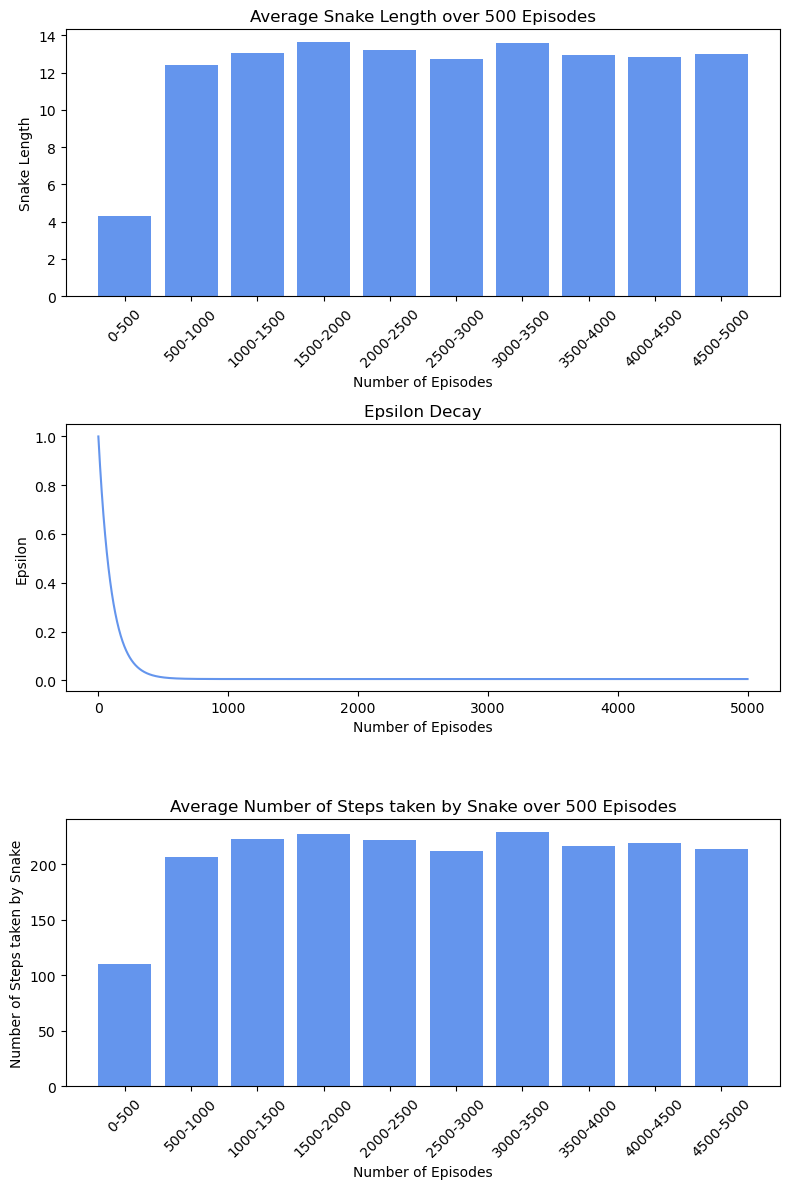

In [16]:
plt.subplots(3, 1, figsize=(8, 12))

x_ticks = ['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000', '3000-3500', '3500-4000','4000-4500','4500-5000']

plt.subplot(3, 1, 1)
plt.bar(x_ticks, avg_score_per_five_hundred, color = 'cornflowerblue')
plt.xlabel("Number of Episodes")
plt.xticks(rotation=45)
plt.ylabel("Snake Length")
plt.title("Average Snake Length over 500 Episodes")

plt.subplot(3, 1, 2)
plt.plot(epsilon_each_episode, color = 'cornflowerblue')
plt.xlabel("Number of Episodes")
plt.ylabel("Epsilon")
plt.title("Epsilon Decay")

plt.subplot(3, 1, 3)
plt.bar(x_ticks, avg_step_per_five_hundred, color = 'cornflowerblue')
plt.xlabel("Number of Episodes")
plt.xticks(rotation=45)
plt.ylabel("Number of Steps taken by Snake")
plt.title("Average Number of Steps taken by Snake over 500 Episodes")

plt.tight_layout()
plt.show()

**Plot 1:** This model learns fairly quickly and settles down in an equilibrium state under 1000 episodes. This is evident by the length of the snake suddenly jumping from 4 in the first 500 episodes to nearly 13 in the next. Overall, the average score is maintained above 12.

**Plot 2:** The epsilon decay is sudden and it reaches near its defined minimum `(0.005)` at around 500 episodes.

**Plot 3:** The survival performance of the snake is also better in this model as during the first 500 episode chuck it is averaging above 100 steps which is nearly 2/3 times more than the previous model. The highest average number of steps reached by this model is nearly 250 during the middle phase of training.

### Model 3

Let us try just once more to improve the model performance.

In [17]:
# total no. of episodes
episodes = 5000

# max steps to be taken during an episode, if this is not specified the game will run till it reaches termination state
max_steps_per_episode = 1000

# learning parameters
learning_rate = 0.01
discount_rate  = 0.6
epsilon = 1
max_epsilon = 1
min_epsilon = 0.005
epsilon_decay_rate = 0.01

# initiallize the Q-table
state_low = env.observation_space.low
state_high = env.observation_space.high
state_size = state_high - state_low
action_size = env.action_space.n
q_table = np.random.rand(*state_size, action_size) * 10**-2

# store each episode variables
rewards_all_episodes = []
epsilon_each_episode = []
step_list = []
score_list = []

# Run the model
simulate3()

In [18]:
# Calculate and print the average score per thousands episodes
score_thousand_episodes = []
score_thousand_episodes = np.split(np.array(score_list), episodes / 1000)
count = 1000
print("# Average reward per thousand episodes: #")
for r in score_thousand_episodes:
    print(count, ": ", str(sum(r) / 1000))
    count += 1000

# Average reward per thousand episodes: #
1000 :  8.298
2000 :  15.65
3000 :  16.393
4000 :  15.385
5000 :  16.419


This is a much better score than the previous model.

In [19]:
# Calculating the averages of the episode variables
# Calculate the average score per five hundred episodes
score_five_hundred_episodes = []
score_five_hundred_episodes = np.split(np.array(score_list), episodes / 500)
cent = 500

avg_score_per_five_hundred = []
for r in score_five_hundred_episodes:
    avg_score_per_five_hundred.append((sum(r) / 500))
    cent += 500

# Calculate the average steps taken by the snake per five hundred episodes
step_five_hundred_episodes = []
step_five_hundred_episodes = np.split(np.array(step_list), episodes / 500)
cent = 500

avg_step_per_five_hundred = []
for r in step_five_hundred_episodes:
    avg_step_per_five_hundred.append((sum(r) / 500))
    cent += 500

Lets plot

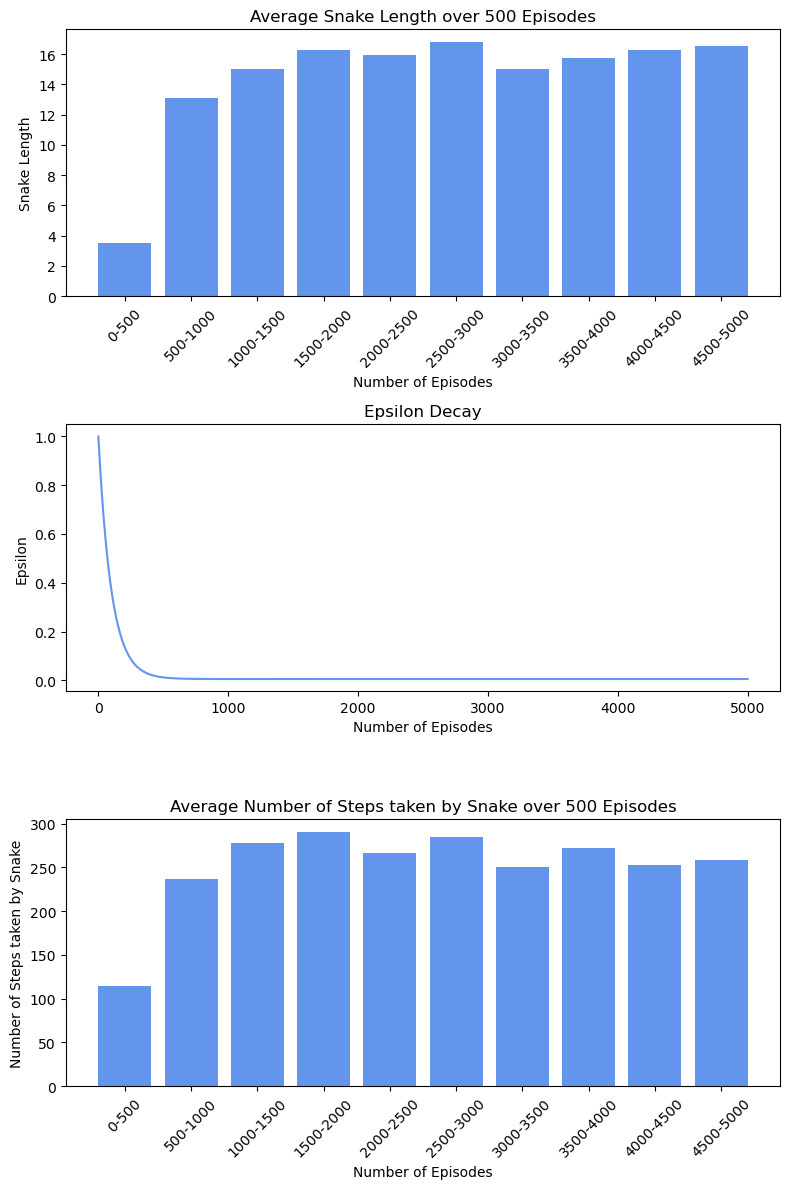

In [20]:
plt.subplots(3, 1, figsize=(8, 12))

x_ticks = ['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000', '3000-3500', '3500-4000','4000-4500','4500-5000']

plt.subplot(3, 1, 1)
plt.bar(x_ticks, avg_score_per_five_hundred, color = 'cornflowerblue')
plt.xlabel("Number of Episodes")
plt.xticks(rotation=45)
plt.ylabel("Snake Length")
plt.title("Average Snake Length over 500 Episodes")

plt.subplot(3, 1, 2)
plt.plot(epsilon_each_episode, color = 'cornflowerblue')
plt.xlabel("Number of Episodes")
plt.ylabel("Epsilon")
plt.title("Epsilon Decay")

plt.subplot(3, 1, 3)
plt.bar(x_ticks, avg_step_per_five_hundred, color = 'cornflowerblue')
plt.xlabel("Number of Episodes")
plt.xticks(rotation=45)
plt.ylabel("Number of Steps taken by Snake")
plt.title("Average Number of Steps taken by Snake over 500 Episodes")

plt.tight_layout()
plt.show()

**Plot 1:** This model also learns quickly, however its performance keeps in improving even beyond the 2500 episode mark. Also, it is reaching an average score of around 16, which is highest yet.

**Plot 2:** The epsilon decay is same as the previous model. Though in this model it still seems to explore beyond the epsilon stagnation.

**Plot 3:** The survival performance of the snake is still better than the previous model. It reaches a maximum of around 300 steps. We notice that the steps survived drops towards the end of training phase though the average score remains nearly constant. This indicates that the snake can now optimize its path to reach the food.

<img src = "images\Snake_AI_easy_trained.gif" width = 300>
<center>Snake Game Environment With Obstacles</center>

### Model Saving and Reloading

We have now optimised the performace of our snake agent and we can now save this model and re-use it when we want it.

For saving this trained model we need to save the populated `Q-table`. This can be done using pickle library.

In [21]:
# Importing pickle library
import pickle

In [22]:
# The Q-table is save in the trained models folder
pickle.dump(q_table, open('trained_models\qtable_trained_5000', 'wb'))

We can reload this model and use it to run few simulation runs on the snake game

In [23]:
# Initializing the snake environment. Note, we are passing the 'render_mode' parameter so that we can visualize the game
env_human = gym.make("Snake-v0", render_mode = 'human', speed = 25)

# Loading the saved Q-table
q_table_trained = pickle.load(open('trained_models\qtable_trained_200', 'rb'))

# Use the below line if you have mistakenly overwritten an untrained Q-table on the saved model.
# q_table_trained = pickle.load(open('trained_models\qtable_trained_200', 'rb'))

# Specifying the number of episode to run and the ma
episodes = 10
max_steps_per_episode = 500

score_list = []

for episode in range(episodes):
    state = env_human.reset()
    for t in range(max_steps_per_episode):
        action = np.argmax(q_table_trained[state])
        next_state, reward, done, trunk, info = env_human.step(action)
        env_human.render()
        if done or t >= max_steps_per_episode - 1:
            score_list.append(info['Score'])
            # printing the episode and score
            print(f"# Episode: {episode + 1} #\t\t# Score:{info['Score']} #\n")
            break
        state = next_state

env_human.close()

# print the average score
print(f"Average score: {sum(score_list)/episodes}")

C:\Users\prana\anaconda3\envs\deeplearning\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
C:\Users\prana\anaconda3\envs\deeplearning\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
C:\Users\prana\anaconda3\envs\deeplearning\lib\site-packages\gym\utils\passive_env_checker.py:199: UserWarning: WARN: The result returned by `env.reset()` should be `(obs, info)` by default, , where `obs` is a observation and `info` is a dictionary containing additional information.
  logger.warn(
C:\Users\prana\anaconda3\envs\deeplearning\lib\site-packages\gym\utils\passive_env_checker.py:137: UserWarning: WARN: The obs re

# Episode: 1 #		# Score:20 #

# Episode: 2 #		# Score:23 #

# Episode: 3 #		# Score:19 #

# Episode: 4 #		# Score:22 #

# Episode: 5 #		# Score:24 #

# Episode: 6 #		# Score:20 #

# Episode: 7 #		# Score:18 #

# Episode: 8 #		# Score:22 #

# Episode: 9 #		# Score:14 #

# Episode: 10 #		# Score:21 #

Average score: 20.3


We are getting a high average score. This means we have successfully implemented a Reinforcement Learning model on a self coded snake game environment.

### But, Wait

Let us do an experiment. Lets try to fit this trained model on another environment. Theoretically it should work as long as the observation space and the action space is similar.

I have coded a different environment where along with food, 2 obstacles are also spawned. Let us check how the trained model performs on this environment.

<img src = "images\Snake_AI_hard_trained.gif" width = 300>
<center>Snake Game Environment With Obstacles</center>

In [24]:
env_obstacle = gym.make("Snake_hard-v0", render_mode = 'human', speed = 25)

# q_table_trained = pickle.load(open('qtable_trained_200', 'rb'))
    
MAX_EPISODES = 5
MAX_TRY = 500
score_test = []

for _ in range(MAX_EPISODES):
    state = env_obstacle.reset()
    for t in range(MAX_TRY):
        action = np.argmax(q_table_trained[state])
        next_state, reward, done, trunk, info = env_obstacle.step(action)
        env_obstacle.render()
        if done or t >= MAX_TRY - 1:
            print(f"# {info} #")
            break
        state = next_state

env_obstacle.close()

# {'Score': 5} #
# {'Score': 11} #
# {'Score': 2} #
# {'Score': 14} #
# {'Score': 11} #


This is interesting, our trained model is able to score fairly high in a similar, yet an unknown environment. This is analogous to transfer learning, however, not the same.

This happens because the observation space and the action space required to navigate the environment are identical.

We need to acknowledge the fact that the performance of our agent is not as good as in the original snake game, and this is because the location of the obstacles are not passed in the observation and is sometimes not able to avoid the obstacle. This can be seen in certain game iterations where the food spawns in line with the snake head and an obstacle also spawns in the path of the snake head and the food. 


### Conclusion

We have successfully completed the implementation of Reinforcement learning, specifically Q-learning algorithm on the self coded snake game environment based on the OpenAi's Gym library. We have understood the basics of working with pygame library and gym library and also learnt the importance of the observation space and action space in a reinforcement learning problem.

Additionally we also tried to implement a trained model on an unseen environment and were successful in it. This shows the strength of reinforcement learning as it is able to tackle unseen problems in unknown environments. Imagine what all problems can be solved using this strength. 
<br>
<img scr = "https://giphy.com/gifs/devrock-python-django-edr-KAq5w47R9rmTuvWOWa/fullscreen" width = 300>
<br>
<center><h1>Happy Learning!!!</h1></center>